In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print(x_data.shape, t_data.shape)

except Exception as err:

    print(str(err))

(759, 8) (759, 1)


In [ ]:
# Logistic Regression 을 keras 이용하여 생성

model = Sequential()

# 노드 1개인 출력층 생성
model.add(Dense(t_data.shape[1], 
                input_shape=(x_data.shape[1],),
                activation='sigmoid'))  

In [ ]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
19/19 - 1s - loss: 0.7318 - accuracy: 0.4596 - val_loss: 0.7073 - val_accuracy: 0.5132
Epoch 2/500
19/19 - 0s - loss: 0.7204 - accuracy: 0.4893 - val_loss: 0.6976 - val_accuracy: 0.5461
Epoch 3/500
19/19 - 0s - loss: 0.7108 - accuracy: 0.5189 - val_loss: 0.6895 - val_accuracy: 0.5724
Epoch 4/500
19/19 - 0s - loss: 0.7027 - accuracy: 0.5519 - val_loss: 0.6827 - val_accuracy: 0.6053
Epoch 5/500
19/19 - 0s - loss: 0.6958 - accuracy: 0.5667 - val_loss: 0.6769 - val_accuracy: 0.6184
Epoch 6/500
19/19 - 0s - loss: 0.6898 - accuracy: 0.5717 - val_loss: 0.6719 - val_accuracy: 0.6250
Epoch 7/500
19/19 - 0s - loss: 0.6847 - accuracy: 0.5832 - val_loss: 0.6676 - val_accuracy: 0.6184
Epoch 8/500
19/19 - 0s - loss: 0.6801 - accuracy: 0.5914 - val_loss: 0.6638 - val_accuracy: 0.6184
Epoch 9/500
19/19 - 0s - loss: 0.6760 - accuracy: 0.6030 - val_loss: 0.6605 - val_accuracy: 0.6316
Epoch 10/500
19/19 - 0s - loss: 0.6725 - accuracy: 0.6046 - val_loss: 0.6575 - val_accuracy: 0.6382
Epoch 11/

In [ ]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7628


[0.48431703448295593, 0.7628458738327026]

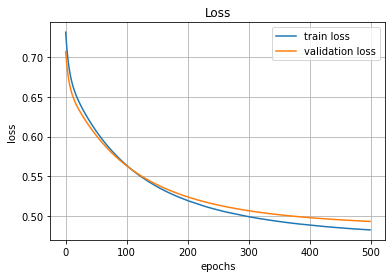

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

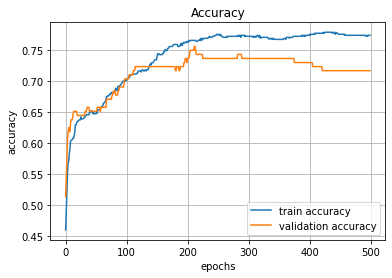

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()